# Model Predictions

### In this Notebook we are going to predict different Models

In [1]:
import pandas as pd
import numpy as np
import yaml
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

colors=['#CBE4F9','#CDF5F6','#EFF9DA','#F9EBDF','#F9D8D6']
from sklearn.svm import SVC
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

#from sklearn.preprocessing import OneHotEncoder

#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, precision_recall_curve
#from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sys import path
from os.path import abspath
     
path.insert(0, abspath('../src'))

In [3]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

In [4]:
from sys import path
from os.path import abspath
     
path.insert(0, abspath('../src'))

In [5]:
data = pd.read_csv(config['data']['predict'])
data

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [6]:
data.gender.value_counts()

M    142
F    134
Name: gender, dtype: int64

In [7]:
data.lung_cancer.value_counts()

YES    238
NO      38
Name: lung_cancer, dtype: int64

In [8]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

### PowerTransformer, StandardScaler and OneHotEncoder

Changing column values

## Applying LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data = data.apply(label_encoder.fit_transform)
data

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,26,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,31,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,16,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,20,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,20,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,16,0,1,1,1,0,0,1,1,0,1,0,1,0,1
272,0,16,1,0,0,0,1,1,1,0,0,0,1,0,0,0
273,1,12,1,0,0,0,0,1,1,0,0,0,1,0,1,0
274,1,4,0,1,1,0,0,0,0,0,0,0,0,1,1,0


## Store file

In [10]:
with open(config['encoders']['label_encoder'], 'wb') as file:
    pickle.dump(label_encoder, file, pickle.HIGHEST_PROTOCOL)

### X, y Spit

In [11]:
X=data.drop(['lung_cancer'],axis=1)
y=data['lung_cancer']

In [12]:
#from imblearn.over_sampling import RandomOverSampler
X_os,y_os=RandomOverSampler().fit_resample(X,y)

### Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,
                                                 test_size=config['testsplit']['test_size'], random_state=config['testsplit']['random_state'])
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['age']=scaler.fit_transform(X_train[['age']])
X_test['age']=scaler.transform(X_test[['age']])
X_train.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
167,1,-1.089780,0,1,0,1,1,1,1,1,1,1,0,1,1
13,1,-0.573626,1,0,0,0,0,1,1,1,1,1,1,0,1
112,0,1.232916,0,1,0,0,0,1,0,1,1,1,1,0,0
146,1,-0.573626,1,0,0,0,0,0,1,1,1,1,0,0,1
444,0,-0.315548,1,0,0,0,0,1,0,0,0,0,1,0,0


## Store file

In [15]:
with open(config['scalers']['std'], 'wb') as file:
    pickle.dump(scaler, file, pickle.HIGHEST_PROTOCOL)
#with open(config['scalers']['std'], 'rb') as file:
#    std_scaler = pickle.load(file)
#    std_scaler.transform(X)
    

#### Storing Train/test data in CSV files

In [16]:
pd.concat([X_train, y_train], axis=1).to_csv(config['data']['train'], index=False)
pd.concat([X_test, y_test.reset_index()], axis=1).to_csv(config['data']['test'], index=False)

# Applying Logistic Regression Model

In [17]:
#param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
#log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
#log.fit(X_train,y_train)
log_reg = LogisticRegression(max_iter=300, multi_class='multinomial',
                          penalty='l2', random_state=1337,
                          solver='sag')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=300, multi_class='multinomial', random_state=1337,
                   solver='sag')

## Store file

In [18]:
with open(config['models']['log_reg'], 'wb') as file:
    pickle.dump(LogisticRegression, file, pickle.HIGHEST_PROTOCOL)

## Training

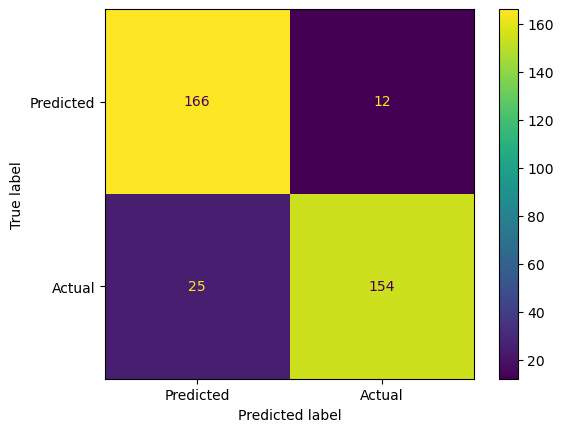

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       178
           1       0.93      0.86      0.89       179

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



In [19]:
y_train_log_reg_pred = log_reg.predict(X_train)
cm = confusion_matrix(y_train, y_train_log_reg_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_train, y_train_log_reg_pred))

In [20]:
#store
#with open(config['models']['y_train_log_reg_pred'], 'wb') as file:
  #  pickle.dump(LogisticRegression, file, pickle.HIGHEST_PROTOCOL)

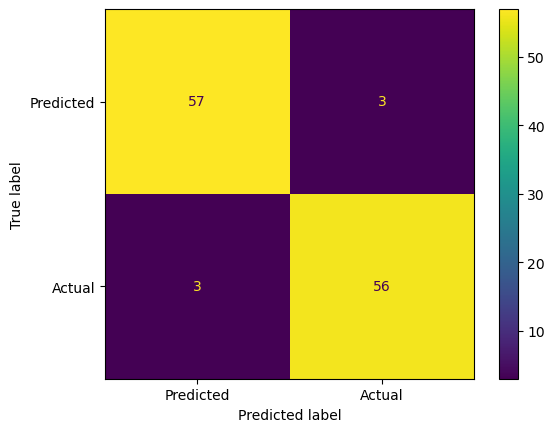

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.95      0.95      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



In [22]:
y_test_log_Reg_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_test_log_Reg_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()
plt.show()
print(classification_report(y_test, y_test_log_Reg_pred))#y_test_pred

In [23]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_log_Reg_pred)

0.8991525423728813

# Applying KNeighbors Classifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform',
                             algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
with open(config['models']['knn'], 'wb') as file:
    pickle.dump(knn, file, pickle.HIGHEST_PROTOCOL)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

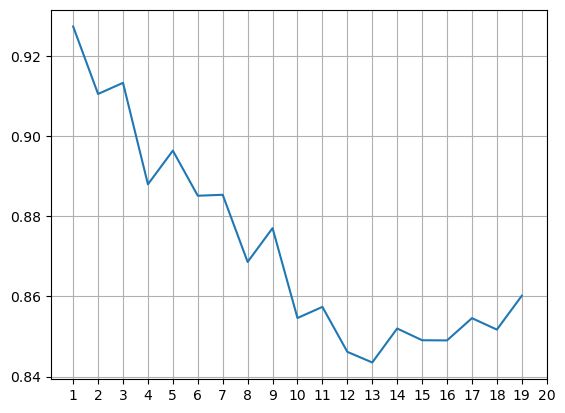

In [26]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks = x_ticks, labels=x_labels)
plt.grid()

In [ ]:
# train knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


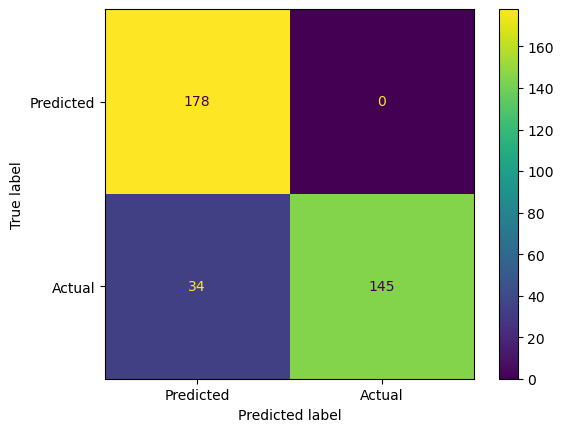

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       178
           1       1.00      0.81      0.90       179

    accuracy                           0.90       357
   macro avg       0.92      0.91      0.90       357
weighted avg       0.92      0.90      0.90       357



In [31]:
y_train_knn_pred = knn.predict(X_train)
knn.fit(X_train, y_train)
cm = confusion_matrix(y_train, y_train_knn_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_train, y_train_knn_pred))

In [ ]:
# test knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



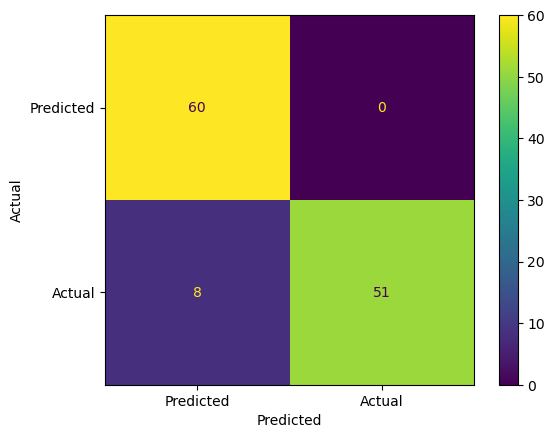

In [32]:
#confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
#plt.figure(figsize=(8,8))
#sns.heatmap(confusion_knn,annot=True)
cm = confusion_matrix(y_test, knn.predict(X_test))
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

# RandomForestClassifier

In [33]:
random_Forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=2, min_samples_split=2)
random_Forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

### save model in file

In [34]:
with open(config['models']['random_Forest'], 'wb') as file:
    pickle.dump(random_Forest, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
 # training  data

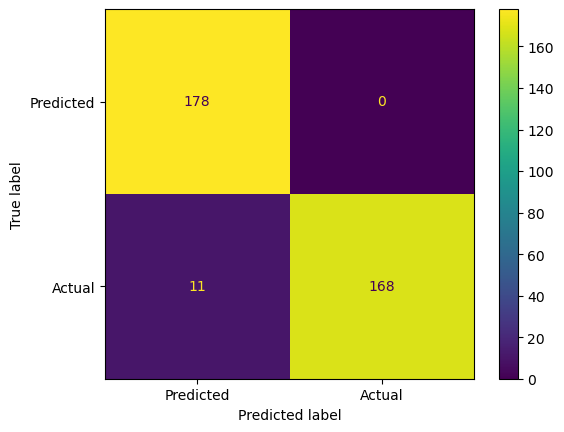

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       178
           1       1.00      0.94      0.97       179

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357



In [35]:
y_train_ranforest_pred = random_Forest.predict(X_train)
#classification_results(randForest, y_train, y_train_ranforest_pred)
cm = confusion_matrix(y_train, y_train_ranforest_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_train, y_train_ranforest_pred))

test set

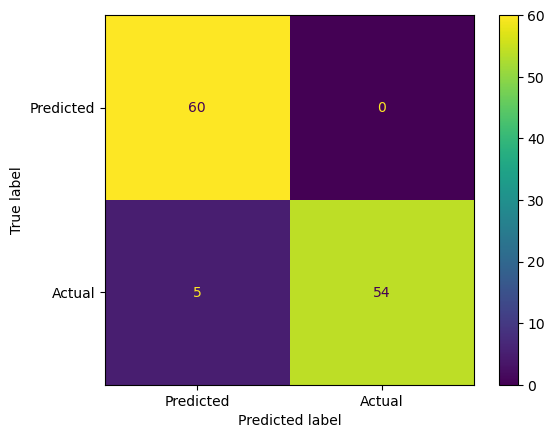

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       1.00      0.92      0.96        59

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



In [36]:
y_test_ranforest_pred = random_Forest.predict(X_test)
#classification_results(randForest, y_train, y_train_ranforest_pred)
cm = confusion_matrix(y_test, y_test_ranforest_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_test, y_test_ranforest_pred))

# Suport Vector Machine

In [37]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]})

In [39]:
with open(config['models']['SVC'], 'wb') as file:
    pickle.dump(rcv, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
#train

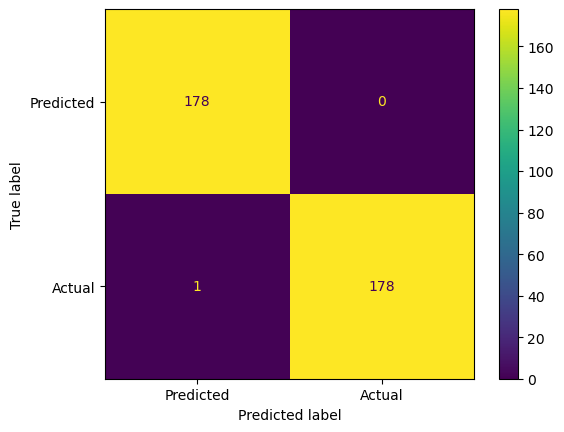

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       1.00      0.99      1.00       179

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



In [40]:
y_train_svc_pred = rcv.predict(X_train)
#classification_results(randForest, y_train, y_train_ranforest_pred)
cm = confusion_matrix(y_train, y_train_svc_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_train, y_train_svc_pred))

In [ ]:
# test

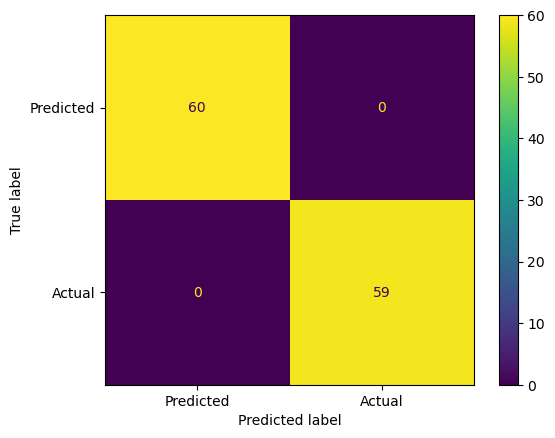

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 1}



In [41]:
y_test_svc_pred = rcv.predict(X_test)
#classification_results(randForest, y_train, y_train_ranforest_pred)
cm = confusion_matrix(y_test, y_test_svc_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()

plt.show()
print(classification_report(y_test, y_test_svc_pred))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

In [ ]:
#y_pred_svc= rcv.predict(X_test)
#confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
#plt.figure(figsize=(8,8))
#sns.heatmap(confusion_svc,annot=True)
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#print(classification_report(y_test,y_pred_svc))
#print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

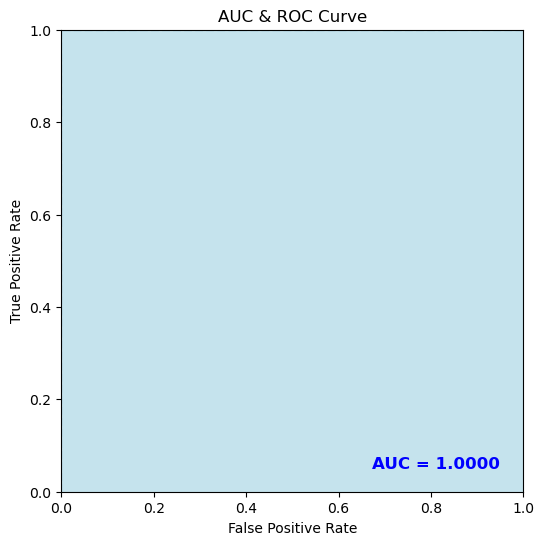

In [42]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_svc_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_svc_pred)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

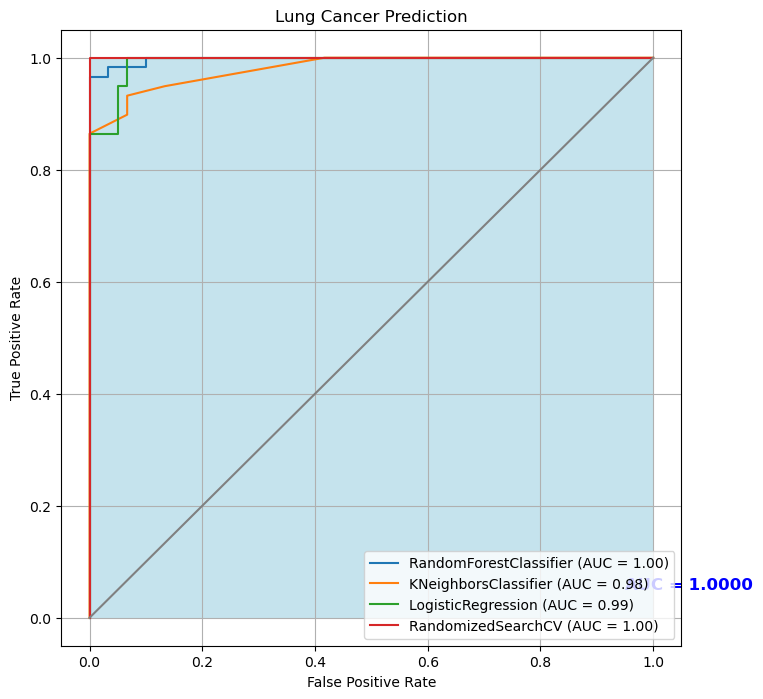

In [44]:
from sklearn.metrics import plot_roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig,ax = plt.subplots(figsize=(8,8))
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='left', fontsize=12, weight='bold', color='blue')
plot_roc_curve(random_Forest, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(log_reg, X_test, y_test, ax=ax)
plot_roc_curve(rcv, X_test, y_test, ax=ax)
plt.plot([0,1], [0,1], linestyle='solid', color='grey')
ax.grid()
ax.set_title('Lung Cancer Prediction')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


#plt.savefig('../plots/roc_curves_satisfaction.png', dpi=300)
plt.show()